Both the problems pertain to text pre processing which is a very important part of NLP problem. It is extremely important 
to process the text data correctly before carrying out any kind of analysis on it. Incorrect or insufficient 
text pre processing can lead to sub optimal or misleading results. NLTK is a very reliable library for text pre
processing. I have mostly used NLTK and standard python function to solve both problems. 

PROBLEM 1:
Libraries used :

1. wordsegment - Splits a string into multiple words even if the words are not separated by space or any other separator. Works very efficiently. The results are better than nltk approach.

2. googletrans - Translate text in other languages to English. The library has limitations and cannot be used in production environment. It is just to demonstrate the process. In production environment we may use Google translate APIs

Steps for solving problem 1

Step 1 : Read the text file

Step 2 : Convert the text file in to list of tweets. The assumption here is that every tweet is separated by next line that is '\n'

Step 3 : Split every string of tweets into words
    
Step 4 : Extract words begining with '#' hashtag in a separate list

Step 5 : Remove non alpha numeric charachters from the hashtag

Step 6 : Translate the hashtags to English (I am using google trans library which is very slow and has limitations of 15K requests, hence I have skipped this step.
        However in actual scenario we can use Google api for translation)
    
Step 7 : Split the hashtag in to normal words using worgsegment library

Step 8 : Drop blank strings from the list


In [ ]:
#read the text file
data=open('./tweets.txt','r',encoding='utf-8')

In [ ]:
#convert the text file into a list of tweets(strings). Assuming that every tweet is represented by a new line '\n'
list_of_tweets=data.readlines()

In [ ]:
#Breakdown every tweet in to a list of words
list_of_words_of_tweets=[]
for i in range(len(list_of_tweets)):
    list_of_words_of_tweets.append(list_of_tweets[i].split())

In [ ]:
#create a list of all hashtags
list_of_hashtags=[]
for i in range(len(list_of_words_of_tweets)):
    for j in range(len(list_of_words_of_tweets[i])):
        if list_of_words_of_tweets[i][j][0]=='#':
            list_of_hashtags.append(list_of_words_of_tweets[i][j])

In [ ]:
#remove hashtag and other non alpha numeric charachters from the list of hashtags
for i in range(len(list_of_hashtags)):
    list_of_hashtags[i]="".join(e for e in list_of_hashtags[i] if e.isalnum())
        

In [ ]:
#Translate non English text to English. Skipped this step due to technical limitations
'''from googletrans import Translator
for i in range(len(list_of_hashtags)):
    translator=Translator()
    translation=translator.translate(list_of_hashtags[i])
    list_of_hashtags[i]=translation.text
    print(i)'''

In [ ]:
import wordsegment as w
w.load()
list_hashtag_words=[]
for i in range(len(list_of_hashtags)):
    list_hashtag_words.append(w.segment(list_of_hashtags[i]))

In [ ]:
list_hashtag_words=list(filter(None,list_hashtag_words))

In [ ]:
list_hashtag_words

PROBLEM 2: Libraries used
    1. NLTK (Remove stopwords, tokenisation, and replace synonyms)
    2. Regex (text preprocessing, remove mentions, hashtags, urls, emojis, smileys and special charachters)
    3. Collections (to count most common words)
The problem follows the standard text pre processing steps to prepare the data. Once the data is prepared the most
frequent words are counted. One must carefully observe the most frequent words to derive any intelligence. The first four
words are name and surname of the personality and the name of the movie. Names of other personalities also occur 
frequently.

Step 1 : Read the text file
    
Step 2 : Split each tweet in to separate item of a list
    
Step 3 : Create lists of tweets that contain the names of the personalities through keyword search and create a list of 
        these lists
        
Step 4 : Remove the url(http)
    
Step 5 : Remove hashtags (#hashtag)
    
Step 6 : Remove mentions (@name)
    
Step 7 : Remove all special characters and smileys and retain only alphanumeric charachters
    
Step 8 : Remove stop words
    
Step 9 : Remove words with less than three characters
    
Step 10 : Lower case the words
    
Step 11 : Lemmatize the words
    
Step 12 : Replace synonyms with a common (base) word
    
Step 13 : Flatten the list of lists for each personality
    
Step 14 : Count the most frequently occuring words

In [1]:
#read the text file
data=open('./tweets.txt','r',encoding='utf-8')

In [2]:
#convert the text file into a list of tweets(strings). Assuming that every tweet is represented by a new line '\n'
list_of_tweets=data.readlines()

In [3]:
#create a list of tweets for each of the personality
tweets_with_ClintEastwood=[]
for tweet in list_of_tweets:
    if ("Clint Eastwood" in tweet) or ("ClintEastwood" in tweet) or ("clint eastwood" in tweet) or ("clinteastwood" in tweet):
        tweets_with_ClintEastwood.append(tweet)

tweets_with_BradleyCooper=[]
for tweet in list_of_tweets:
    if ("Bradley Cooper" in tweet) or ("BradleyCooper" in tweet) or ("bradley cooper" in tweet) or ("bradleycooper" in tweet):
        tweets_with_BradleyCooper.append(tweet)
    
tweets_with_ChrisKyle=[]
for tweet in list_of_tweets:
    if ("Chris Kyle" in tweet) or ("ChrisKyle" in tweet) or ("chris kyle" in tweet) or ("chriskyle" in tweet):
        tweets_with_ChrisKyle.append(tweet)

tweets_with_personalities=[tweets_with_ClintEastwood,tweets_with_BradleyCooper,tweets_with_ChrisKyle]

In [4]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/gaurav/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/gaurav/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/gaurav/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet as wn
#I have avoided use of regex to a great extent but I think that in text pre processing regex can provide an efficient 
# and quick solution. Another library tweet-preprocessor can efficiently pre process tweets but this library
#doesn't work in windows environment hence I have not used it.

In [6]:

stop_words = set(stopwords.words('english')) 
lemmatizer = WordNetLemmatizer()

for tweets in tweets_with_personalities:
    for i in range(len(tweets)):
        #remove url
        tweets[i] = re.sub(r'http\S+', '', tweets[i])
        #remove hashtags
        tweets[i] = re.sub(r'#\S+', '', tweets[i])
        #remove mentions
        tweets[i] = re.sub(r'@\S+', '', tweets[i])
        #remove special charachters and symbols
        tweets[i] = re.sub('\W+',' ', tweets[i] )
        #tokenize
        tweets[i]=word_tokenize(tweets[i])
        #remove stop words
        without_stop_words=[]
        for w in tweets[i]:
            if w not in stop_words: 
                without_stop_words.append(w)
        tweets[i]=without_stop_words
        #remove words with less than 3 characters
        tweets[i] = [w for w in tweets[i] if len(w)>2]
        #lowercase the words
        tweets[i] = [w.lower() for w in tweets[i]]
        #lemmatize the words
        tweets[i] = [lemmatizer.lemmatize(w) for w in tweets[i]]
        #replace all synonyms with base word
        for j in range(len(tweets[i])):
            try:
                syn=wn.synsets(str(tweets[i][j]))[0].lemma_names()
                tweets[i][j]=syn[0]
            except:
                tweets[i][j]=tweets[i][j]

In [7]:
#flatten the list of lists for tweets with the names of personalities

tweets_with_ClintEastwood_flat = []
for sublist in tweets_with_ClintEastwood:
    for item in sublist:
        tweets_with_ClintEastwood_flat.append(item)

tweets_with_BradleyCooper_flat = []
for sublist in tweets_with_BradleyCooper:
    for item in sublist:
        tweets_with_BradleyCooper_flat.append(item)

tweets_with_ChrisKyle_flat = []
for sublist in tweets_with_ChrisKyle:
    for item in sublist:
        tweets_with_ChrisKyle_flat.append(item)

#create a list of flattened lists
tweets_with_personalities_flat=[tweets_with_ClintEastwood_flat,tweets_with_BradleyCooper_flat,tweets_with_ChrisKyle_flat]

In [8]:
#count the most common words (I am taking top 15 for each personality)
from collections import Counter
common_words=[]
for i in range(len(tweets_with_personalities_flat)):
    common_words_personality=[]
    counter_obj = Counter(tweets_with_personalities_flat[i])
    words_top_tuple=counter_obj.most_common()[0:15]
    print(words_top_tuple)
    for j in range(len(words_top_tuple)):
        common_words_personality.append(words_top_tuple[j])
    common_words.append(common_words_personality)


[('clint', 3143), ('eastwood', 3128), ('American', 2748), ('sniper', 2725), ('movie', 1907), ('reappraisal', 1444), ('book', 1374), ('interpretation', 1364), ('Bradley', 274), ('Cooper', 271), ('director', 249), ('box', 139), ('office', 137), ('with', 131), ('club', 122)]
[('Cooper', 3416), ('Bradley', 3403), ('American', 2767), ('sniper', 2665), ('movie', 851), ('kyle', 504), ('see', 450), ('chris', 412), ('best', 310), ('eastwood', 283), ('clint', 273), ('actor', 226), ('Academy_Award', 226), ('talk', 225), ('performance', 219)]
[('American', 3693), ('kyle', 3572), ('chris', 3475), ('sniper', 3467), ('movie', 1101), ('memorial', 857), ('edition', 842), ('writer', 814), ('see', 582), ('hero', 555), ('Cooper', 443), ('Scott', 433), ('mcewen', 433), ('Bradley', 428), ('the', 414)]


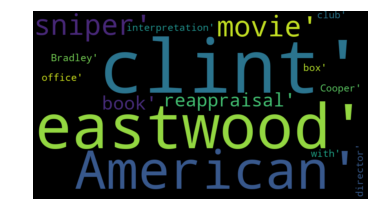

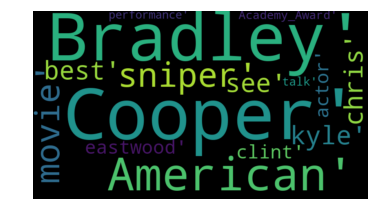

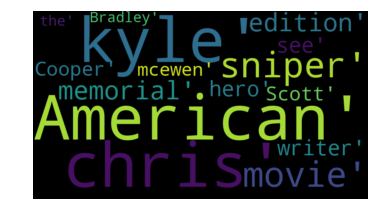

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for x in common_words:
    text=[]
    for y in x:
        text.append(y[0])
    wordcloud = WordCloud(width=854, height=480, margin=0).generate(str(text))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.show()

The most common words in tweets with the names of all three personalities are the name of the movie (American Sniper), the name of the personality itself and the term 'movie'. This information is obvious and will not give any intelligence. However, when we look further we can notice other words that are associated with the personality.

Clint Eastwood : Reappraisal, Book, Interpretation, Director
    
Bradley Cooper : Best, Actor, Academy_Award
    
Chris Kyle     : Memorial, Edition, Writer